In [8]:
from basic_libs import *
import learn_helper  as lh

## Data processing

In [9]:
cd ..

/Users/marcelocolares/Desktop/disertacao


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [11]:
caminho_test = "../archive-2/test.csv"
caminho_train_1 = "../archive-2/train_1.csv"
caminho_valid = "../archive-2/valid.csv"


df_test = pd.read_csv(caminho_test)
df_train_1 = pd.read_csv(caminho_train_1)
df_valid = pd.read_csv(caminho_valid)

df_concatenado = pd.concat([df_test, df_train_1, df_valid])

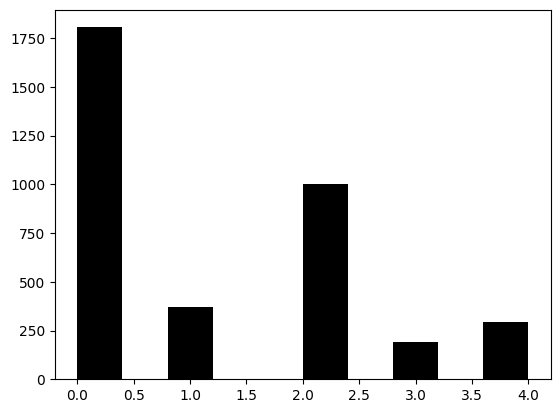

In [12]:
lh.plot_hist(df_concatenado["diagnosis"]);

In [13]:
ls

847200a009.pdf           dissertacoes/            mobilenet_v2_weights.h5
codes/                   jpm-10-00213-v2.pdf


In [15]:
caminho_base = '../archive-2/test_images'

caminhos_test = []
caminhos_train = []
caminhos_val = []


for pasta in ['../archive-2/test_images/test_images/', '../archive-2/train_images/train_images/']:
  caminho_pasta =pasta
  for nome_arquivo in os.listdir(caminho_pasta):
    caminho_imagem = os.path.join(caminho_pasta, nome_arquivo)
    caminhos_test.append(caminho_imagem)

paths=concatenated_array = np.concatenate((caminhos_test, caminhos_train, caminhos_val))

## Compose dataset

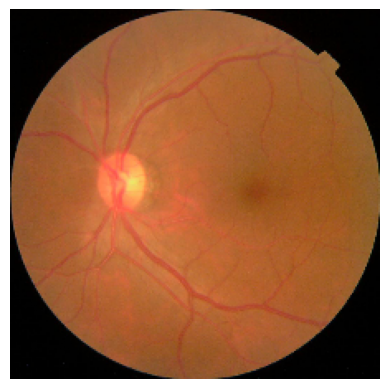

In [16]:
filtered_image=lh.preprocess_image((paths[60]))

lh.plot_image(filtered_image)

In [17]:
images=[]
for i in range(len(paths)):
  images.append(lh.preprocess_image(paths[i]))

In [18]:
def get_labels(path):
  linhas_filtradas = df_concatenado.loc[df_concatenado['id_code']+".png" == os.path.basename(path)]

  return  np.array(linhas_filtradas["diagnosis"])[0]

In [19]:
def get_binary_labels(path):
  linhas_filtradas = df_concatenado.loc[df_concatenado['id_code']+".png" == os.path.basename(path)]
  if(linhas_filtradas["diagnosis"].values[0]==0):
    return 0
  else:
    return 1
  return  np.array(linhas_filtradas["diagnosis"])[0]

In [20]:
labels=[]
for i in range(len(images)):
  if(paths[i]=="/content/drive/MyDrive/Aptos/test_images/train_images/train_images/2b48daf24be0 (1).png"):
    labels.append(get_binary_labels("/content/drive/MyDrive/Aptos/test_images/train_images/train_images/2b48daf24be0.png"))
  else:
    labels.append(get_binary_labels(paths[i]))

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


## Feature extraction

In [22]:
import ssl
import urllib.request

context = ssl._create_unverified_context()
url = 'https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
response = urllib.request.urlopen(url, context=context)


In [23]:
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context
urllib.request.urlretrieve('https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5', 'mobilenet_v2_weights.h5')


('mobilenet_v2_weights.h5', <http.client.HTTPMessage at 0x17f2f6350>)

In [27]:
from tensorflow.keras.applications import ResNet101V2
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [29]:
num_classes = 2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])


#base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

for i in range(0,6):  
    X_train_features, X_test_features, y_train, y_test  = lh.fine_tune_model(X_train, X_test, y_train, y_test, num_classes,base_model,i)
    print("end iteration")

Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 33s 186ms/step - accuracy: 0.8551 - loss: 0.3979 - val_accuracy: 0.9621 - val_loss: 0.1370
Epoch 2/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - accuracy: 0.9372 - loss: 0.1805 - val_accuracy: 0.9242 - val_loss: 0.1930
Epoch 3/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - accuracy: 0.9356 - loss: 0.1620 - val_accuracy: 0.9197 - val_loss: 0.1997
83/83 ━━━━━━━━━━━━━━━━━━━━ 25s 291ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 281ms/step


end iteration
Epoch 1/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 200ms/step - accuracy: 0.8462 - loss: 0.4229 - val_accuracy: 0.9545 - val_loss: 0.1558
Epoch 2/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 39s 230ms/step - accuracy: 0.9133 - loss: 0.2434 - val_accuracy: 0.9606 - val_loss: 0.1232
Epoch 3/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - accuracy: 0.9453 - loss: 0.1609 - val_accuracy: 0.9682 - val_loss: 0.1160
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 464ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 333ms/step


end iteration
Epoch 1/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 84s 492ms/step - accuracy: 0.8473 - loss: 0.5680 - val_accuracy: 0.9576 - val_loss: 0.1331
Epoch 2/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 88s 531ms/step - accuracy: 0.9432 - loss: 0.1545 - val_accuracy: 0.9424 - val_loss: 0.1640
Epoch 3/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 95s 571ms/step - accuracy: 0.9580 - loss: 0.1214 - val_accuracy: 0.9591 - val_loss: 0.1280
83/83 ━━━━━━━━━━━━━━━━━━━━ 32s 375ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step


end iteration
Epoch 1/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 86s 503ms/step - accuracy: 0.8622 - loss: 0.4278 - val_accuracy: 0.9303 - val_loss: 0.1946
Epoch 2/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 83s 498ms/step - accuracy: 0.9510 - loss: 0.1513 - val_accuracy: 0.9394 - val_loss: 0.1395
Epoch 3/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 96s 578ms/step - accuracy: 0.9630 - loss: 0.1175 - val_accuracy: 0.9273 - val_loss: 0.2019
83/83 ━━━━━━━━━━━━━━━━━━━━ 32s 381ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step


end iteration
Epoch 1/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 82s 475ms/step - accuracy: 0.8799 - loss: 0.3777 - val_accuracy: 0.9212 - val_loss: 0.2048
Epoch 2/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 85s 511ms/step - accuracy: 0.9553 - loss: 0.1293 - val_accuracy: 0.9455 - val_loss: 0.1358
Epoch 3/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 86s 517ms/step - accuracy: 0.9635 - loss: 0.1297 - val_accuracy: 0.9106 - val_loss: 0.2375
83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 414ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 343ms/step


end iteration
Epoch 1/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 85s 497ms/step - accuracy: 0.8577 - loss: 0.6037 - val_accuracy: 0.9394 - val_loss: 0.1676
Epoch 2/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 83s 497ms/step - accuracy: 0.9522 - loss: 0.1366 - val_accuracy: 0.9258 - val_loss: 0.1788
Epoch 3/3
165/165 ━━━━━━━━━━━━━━━━━━━━ 88s 515ms/step - accuracy: 0.9634 - loss: 0.1020 - val_accuracy: 0.8788 - val_loss: 0.3050
83/83 ━━━━━━━━━━━━━━━━━━━━ 31s 373ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step


end iteration


## Post processing

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train_features)

X_train_o =X_train_features #scaler.transform(X_train_features)
X_test_o = X_test_features#scaler.transform(X_test_features)

X_train_features = scaler.transform(X_train_features)
X_test_features = scaler.transform(X_test_features)


In [17]:
lh.generate_result(X_train_features, X_test_features, y_train, y_test)

[0.9651515151515152, 0.9606060606060606, 0.9515151515151515, 0.9621212121212122, 0.956060606060606, 0.9606060606060606, 0.9651515151515152, 0.9651515151515152, 0.9742424242424242, 0.9545454545454546]
[0.9649398653867373, 0.9603214695752009, 0.950916573827697, 0.9621296389928203, 0.9561107080873102, 0.9599498797667197, 0.9653492647058823, 0.9652583237657865, 0.9740620891900091, 0.9541752933057281]
[0.9652864044168392, 0.9614403697599692, 0.9519151802604018, 0.9620404411764706, 0.9565257352941177, 0.9610713461094436, 0.9650287026406429, 0.9651515151515151, 0.9743891669119811, 0.9547443775969928]
[0.9650930965734665, 0.960562240873698, 0.9513364055299539, 0.9620828248984854, 0.9560524339925468, 0.9604301948051948, 0.9651335055986219, 0.9651495150088962, 0.9742054141042589, 0.9544245058051211]


,training time (s),training time std,testing time (ms),testing time std,accuracy,accuracy std,precision,precision std,recall,recall std,f1-score,f1-score std,best params
0,21.6,3.8169,70.2351,4.0887,96.152,0.618,96.132,0.63,96.176,0.607,96.145,0.621,"{'hidden_layer_sizes': (32,)}"
